<ipython-input-3-9c4f762838ee>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


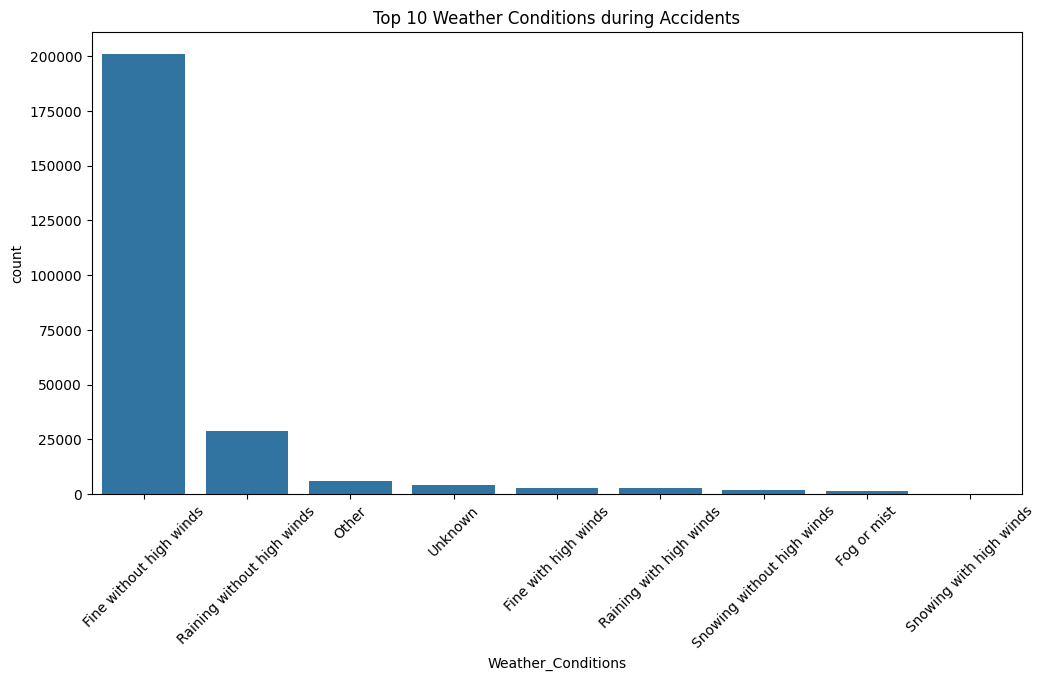

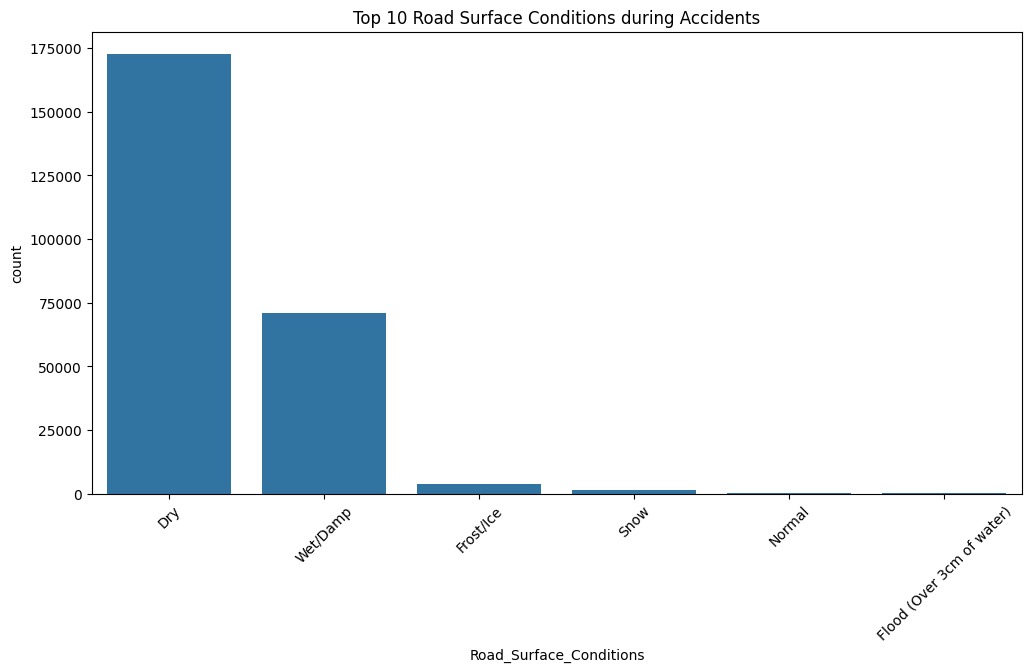

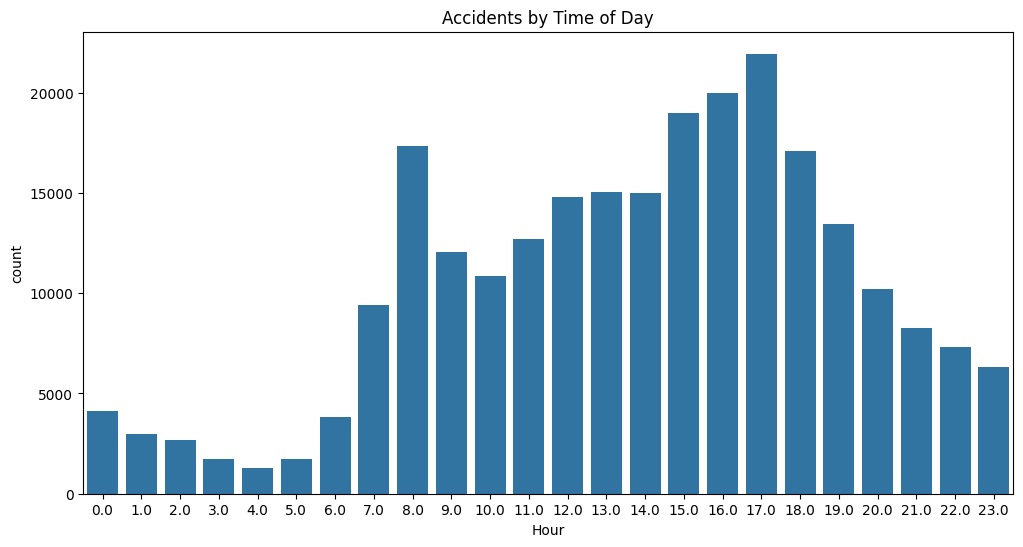

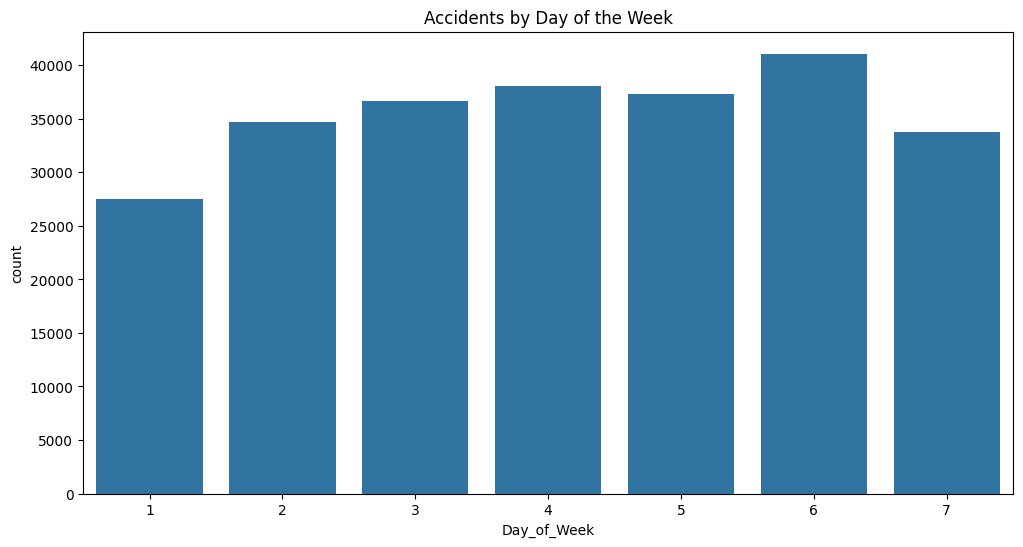

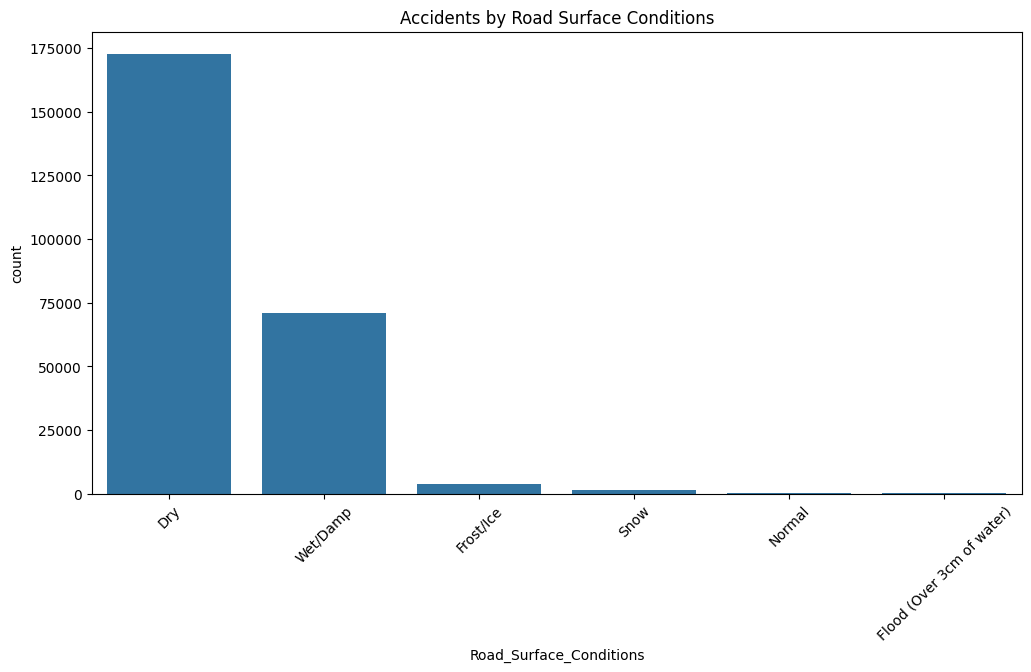

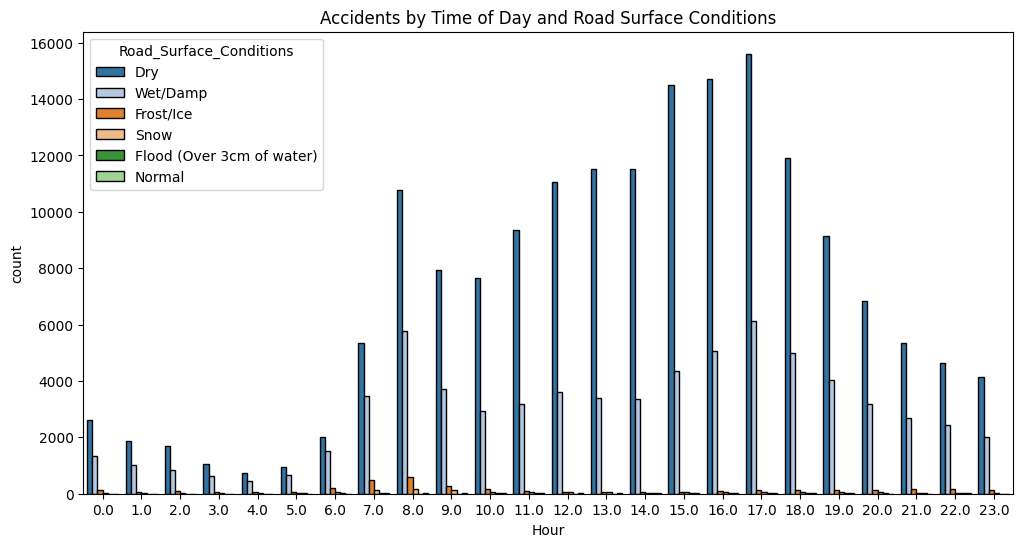

Analysis and visualizations complete. Check the saved HTML file for the accident hotspots map.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Load the dataset
file_path = '/content/UK_Accident.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Display basic information about the dataset
#print("Basic information about the dataset:")
#print(df.info(), '\n')

# Summary statistics of the dataset
#print("Summary statistics of the dataset:")
#print(df.describe(), '\n')

# Check for missing values
#print("Missing values in the dataset:")
#print(df.isnull().sum(), '\n')

# Data cleaning
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Drop rows with missing Latitude or Longitude
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Exploratory Data Analysis (EDA)

# Plot distribution of accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Weather Conditions during Accidents')
plt.show()

# Plot distribution of accidents by road surface conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Road Surface Conditions during Accidents')
plt.show()

# Plot distribution of accidents by time of day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour')
plt.title('Accidents by Time of Day')
plt.show()

# Plot distribution of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Day_of_Week')
plt.title('Accidents by Day of the Week')
plt.show()

# Plot bar graph of road surface conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Accidents by Road Surface Conditions')
plt.show()

# Plot bar graph of time of the day and road conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Road_Surface_Conditions', palette='tab20', edgecolor='black')
plt.title('Accidents by Time of Day and Road Surface Conditions')
plt.show()

# Visualize accident hotspots on a map
accidents_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5, tiles='Stamen Toner')

# Add accidents as points on the map
for idx, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=2,
                        weight=1,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.7).add_to(accidents_map)

# Save the map to an HTML file
accidents_map.save('/content/uk_accidents_hotspots_map.html')

print("Analysis and visualizations complete. Check the saved HTML file for the accident hotspots map.")
